In [22]:
import yfinance as yf 
import pandas as pd
from matplotlib import pylab as plt
import numpy as np
from datetime import datetime 

import quandl

import seaborn as sns

import sys

from scipy.stats import norm
import pandas_datareader.data as web

from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Analysis of the Drivers of Gold

This script looks for what drives the price of Gold, which should be inflation since Gold is a dead asset. With low inflation of the monetary system gold should perform poorly. But is this true? Lets find out.

In [23]:
Gold_tmp = quandl.get("LBMA/GOLD", authtoken="6rNSyTM5R4g7_B7XSyQW")
M2_tmp = web.DataReader("M2NS", "fred", datetime(1960, 1, 1))

In [24]:
Gold =Gold_tmp['USD (AM)']

Gold = Gold.resample('M').last()

In [31]:
data_tmp = pd.concat([Gold, M2_tmp], axis = 1)
data_tmp = data_tmp.ffill()
data_tmp = data_tmp.dropna()

dates_month = pd.bdate_range(data_tmp.index.min(), data_tmp.index.max(), freq='1M')
data = data_tmp[data_tmp.index.isin(dates_month)]

data = data/data.shift(12)
data = data.dropna()
data.columns = ['Gold', 'M2']

data['Gold'] = np.log(data['Gold'])

Correlation: 0.019180340661352855


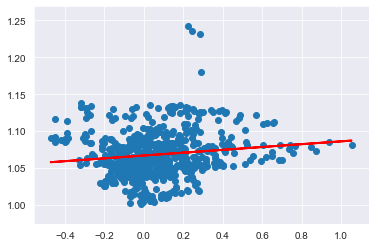

In [32]:
regressor = LinearRegression()  
regressor.fit(data['Gold'].values.reshape(-1,1), data['M2'].values.reshape(-1,1))

y_pred = regressor.predict(data['Gold'].values.reshape(-1,1))

plt.scatter(data['Gold'], data['M2'])
plt.plot(data['Gold'], y_pred, color='red', linewidth=2)

print("Correlation: " + str(float(regressor.coef_)))

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


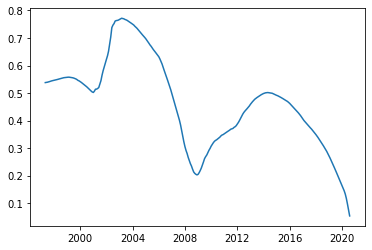

In [8]:
plt.plot(corr)

In [9]:
corr

1976-05-31         NaN
1976-06-30         NaN
1976-07-31         NaN
1976-08-31         NaN
1976-09-30         NaN
                ...   
2020-03-31    0.132788
2020-04-30    0.116899
2020-05-31    0.096530
2020-06-30    0.074319
2020-07-31    0.053583
Length: 531, dtype: float64

# Gold correlation with Stocks to gold ratio


In [13]:
SP500_daily_tmp=yf.download('^GSPC')

[*********************100%***********************]  1 of 1 completed


In [14]:
Gold = pd.DataFrame(Gold_tmp["USD (AM)"])
SP500 = pd.DataFrame(SP500_daily_tmp['Close'])

In [ ]:
data = pd.concat([SP500,Gold], axis = 1)
data = data.ffill()
data = data.dropna()
data = data.fillna(1)
data.columns = ['SP', 'Gold']


In [ ]:
Stocks_to_gold = data[['SP']].div(data['Gold'], axis = 0)
Stocks_to_gold.columns = ['Stocks/Gold']
Gold_to_stocks = data[['Gold']].div(data['SP'], axis = 0)


In [ ]:
data['SP'] = data['SP'].div(data['SP'].iloc[0])
data['Gold'] = data['Gold'].div(data['Gold'].iloc[0])

In [ ]:
sns.set_style("darkgrid");
plt.figure(figsize=(20,10))
plt.plot(Stocks_to_gold)
plt.plot(data['Gold'])
plt.legend(('Stocks/Gold', 'Gold'), loc=2, prop={'size': 20})

In [ ]:
daily_data = data/data.shift(1)
daily_data = daily_data.fillna(1)

In [ ]:
s1 = data['Gold']
s2 = Stocks_to_gold.iloc[:, 0]
rolling_corr = s1.rolling(252).corr(s2)
plt.plot(rolling_corr)
print("Average correlation = " + str(round(float(rolling_corr.mean()), 2)))

Obviously negative correaltion since the gold price is usen in stocks/gold. Would be more interesting to see if the gold/stock ratio has any predictive ability of future gold price.